# 1. 강의영상 

{{<video ???? >}}

# 2. Imports 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.tree
import graphviz 

# 3. Data 

In [2]:
# # 데이터 크기 설정
# n = 10000

# # 무작위로 복용 여부와 운동량을 생성
# Supplement = np.random.choice([True, False], n)
# Exercise = np.random.choice([False, True], n)

# # 체중 감량 여부를 계산 (이 부분은 수정하지 않습니다)

# # 연속형 변수 생성
# Weight_Loss = np.where(
#     (~Supplement & (~Exercise)),
#     np.random.normal(loc=0, scale=1, size=n),  # 낮은 운동량에서 체중 감량
#     np.where(
#         (Supplement & (Exercise)),
#         np.random.normal(loc=15.00, scale=1, size=n),  # 높은 운동량에서 체중 감량
#         np.where(
#             (~Supplement & (Exercise)),
#             np.random.normal(loc=5.00, scale=1, size=n),  # 낮은 운동량에서 체중 증가
#             np.random.normal(loc=0.5, scale=1, size=n)   # 높은 운동량에서 체중 증가
#         )
#     )
# )

# # 데이터프레임 생성
# df = pd.DataFrame({
#     'Supplement': Supplement,
#     'Exercise': Exercise,
#     'Weight_Loss': Weight_Loss
# })
df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/weightloss.csv')

In [3]:
df.pivot_table(index='Supplement',columns='Exercise',values='Weight_Loss')

Exercise,False,True
Supplement,,
False,0.021673,4.991314
True,0.497573,14.966363


`-` 운동과 체중감량보조제를 병행하면 시너지가 나는 것 같음 

# 4. 분석

`-` 분석1: 모형을 아래와 같이 본다. 

- ${\bf X}$: `Supplement`, `Exercise`
- ${\bf y}$: `Weight_Loss`

In [4]:
# step1
X = df[['Supplement','Exercise']]
y = df['Weight_Loss']
# step2 
predictr = sklearn.tree.DecisionTreeRegressor()
# step3
predictr.fit(X,y)
# step4 
yhat = predictr.predict(X)

In [5]:
df.assign(yhat = yhat)

,Supplement,Exercise,Weight_Loss,yhat
0,False,False,-0.877103,0.021673
1,True,False,1.604542,0.497573
2,True,True,13.824148,14.966363
3,True,True,13.004505,14.966363
4,True,True,13.701128,14.966363
...,...,...,...,...
9995,True,False,1.558841,0.497573
9996,False,False,-0.217816,0.021673
9997,False,True,4.072701,4.991314
9998,True,False,-0.253796,0.497573


In [6]:
df.assign(yhat = yhat).pivot_table(index='Supplement',columns='Exercise',values='yhat')

Exercise,False,True
Supplement,,
False,0.021673,4.991314
True,0.497573,14.966363


In [7]:
predictr.score(X,y)

0.9727754257714795

# 5. 시각화 

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\nsquared_error = 37.117\nsamples = 10000\nvalue = 5.119'),
 Text(0.25, 0.5, 'x[0] <= 0.5\nsquared_error = 1.063\nsamples = 5007\nvalue = 0.262'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.976\nsamples = 2479\nvalue = 0.022'),
 Text(0.375, 0.16666666666666666, 'squared_error = 1.036\nsamples = 2528\nvalue = 0.498'),
 Text(0.75, 0.5, 'x[0] <= 0.5\nsquared_error = 25.89\nsamples = 4993\nvalue = 9.99'),
 Text(0.625, 0.16666666666666666, 'squared_error = 1.035\nsamples = 2491\nvalue = 4.991'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.995\nsamples = 2502\nvalue = 14.966')]

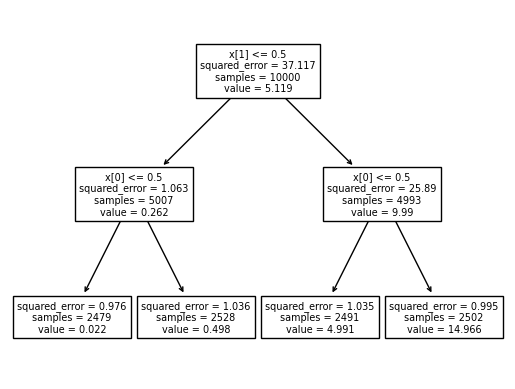

In [8]:
sklearn.tree.plot_tree(predictr)

In [17]:
print(sklearn.tree.export_text(predictr))

|--- feature_1 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- value: [0.02]
|   |--- feature_0 >  0.50
|   |   |--- value: [0.50]
|--- feature_1 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- value: [4.99]
|   |--- feature_0 >  0.50
|   |   |--- value: [14.97]



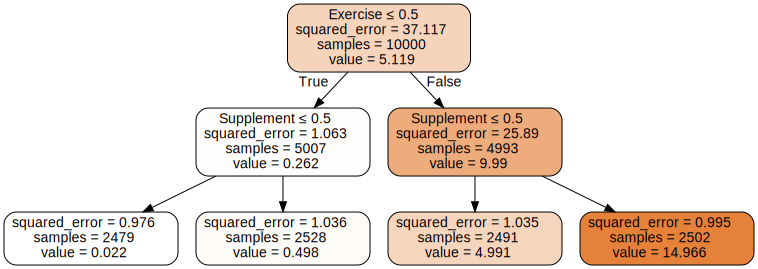

In [14]:
dot_data = sklearn.tree.export_graphviz(predictr, 
                      feature_names=predictr.feature_names_in_,  
#                      class_names=predictr.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 